## Complete Text to ASL finger spelling

=================================== Text to ASL finger spelling ======================================
Enter text: Sherlock Holmes


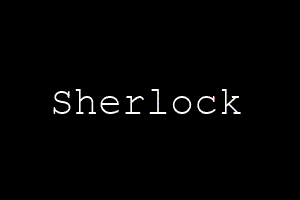

In [3]:
# Import Modules
from PIL import Image, ImageDraw, ImageFont
import IPython.display
import os
import cv2
import numpy as np


print("=================================== Text to ASL finger spelling ======================================")
# Input the text to convert to sign
input_str = input('Enter text: ')
str_list = input_str.split()

#Black image
image_height = 300
image_width = 200
black_img = Image.new("RGB", (image_height, image_width), 'black')

font = ImageFont.truetype("cour.ttf", 40)
images = []

folder_path = "C:/Python/Python37/Scripts/Project/Github/Text-to-ASL/Images"
for i in range(len(str_list)):
    work_str = str_list[i].upper()
    #print(work_str)
    
    # Text on the black screen as separator
    draw = ImageDraw.Draw(black_img)
    draw.text((image_width/4,image_height/2-70),str_list[i],(255,255,255),font = font)
    
    # Append black image
    images.append(black_img)
    
    for element in work_str:
        #print(element)
        # Go through folders and check for filename that matches the provided string
        for image_name in os.listdir(folder_path):
            
            if image_name.startswith(element):
                image_path = folder_path + '/' + image_name
                #print(image_path)
                
                # Converting image into PIL Image format
                img = cv2.imread(image_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                im_pil = Image.fromarray(img)
                
                # Append the PIL Image
                images.append(im_pil)
                
    # Reset the black image again, to avoid overlapping between text            
    black_img = Image.new("RGB", (image_height, image_width), 'black')
    draw = ImageDraw.Draw(black_img)
    
    
# Storing as a gif    
filename = 'ASL-' + input_str + '.gif'
path = 'C:/Python/Python37/Scripts/Project/Github/Text-to-ASL/ASLgifs/' + filename
images[0].save(path, format='GIF', append_images = images[1:], save_all=True, duration=1000,loop = 2)
IPython.display.Image(filename = path)

